In [17]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd

from scipy.ndimage import binary_fill_holes, binary_dilation, binary_closing, binary_opening
from skimage.measure import label
from skp.toolbox.functions import plot_3d_image, plot_3d_image_side_by_side

In [18]:
ROOT = "/mnt/stor/datasets/kaggle/rsna-intracranial-hemorrhage-detection/"

In [19]:
df = pd.read_csv(os.path.join(ROOT, "train_slices_with_2dc_kfold.csv"))
df.head()

,SOPInstanceUID,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any,filepath,PatientID,StudyInstanceUID,SeriesInstanceUID,filepath_2dc,outer,inner0,inner1,inner2,inner3,inner4,fold
0,ID_36a144b7a,0,0,0,0,0,0,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0000...,ID_b9797064,ID_00b9e1961f,ID_0000298a7d,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0000...,1,4,-1,0,0,4,1
1,ID_9a319f990,0,0,0,0,0,0,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0001...,ID_b9797064,ID_00b9e1961f,ID_0000298a7d,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0000...,1,4,-1,0,0,4,1
2,ID_d8a328562,0,0,0,0,0,0,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0002...,ID_b9797064,ID_00b9e1961f,ID_0000298a7d,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0001...,1,4,-1,0,0,4,1
3,ID_f870dcfd0,0,0,0,0,0,0,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0003...,ID_b9797064,ID_00b9e1961f,ID_0000298a7d,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0002...,1,4,-1,0,0,4,1
4,ID_8db919b5c,0,0,0,0,0,0,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0004...,ID_b9797064,ID_00b9e1961f,ID_0000298a7d,ID_b9797064/ID_00b9e1961f/ID_0000298a7d/IM0003...,1,4,-1,0,0,4,1


In [20]:
pid = df.PatientID.iloc[1000]
tmp_df = df[df.PatientID == pid]
tmp_df = tmp_df.sort_values("filepath", ascending=True)

array = np.stack([cv2.imread(os.path.join(ROOT, "stage_2_train_png", f), 0) for f in tmp_df.filepath.values], axis=0)
mask = (array > 0).astype("uint8")

mask_label = label(mask)
labels, counts = np.unique(mask_label, return_counts=True)
labels, counts = labels[1:], counts[1:]
max_label = labels[np.argmax(counts)]
mask = mask_label == max_label
mask = np.stack([binary_fill_holes(binary_opening(mask[i])) for i in range(mask.shape[0])], axis=0).astype("uint8")

In [21]:
coords = np.stack(np.where(mask))
t_min, t_max = coords[0].min(), coords[0].max()
h_min, h_max = coords[1].min(), coords[1].max()
w_min, w_max = coords[2].min(), coords[2].max()

array = array[t_min:t_max, h_min:h_max, w_min:w_max]
mask = mask[t_min:t_max, h_min:h_max, w_min:w_max]

print(t_min, t_max, h_min, h_max, w_min, w_max)
print(array.shape, mask.shape)

0 29 11 465 43 417
(29, 454, 374) (29, 454, 374)


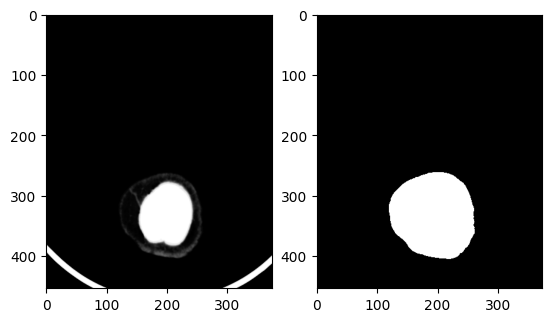

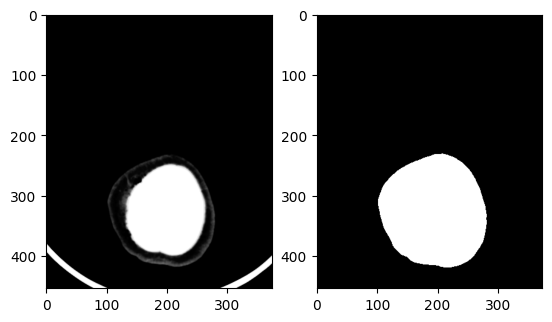

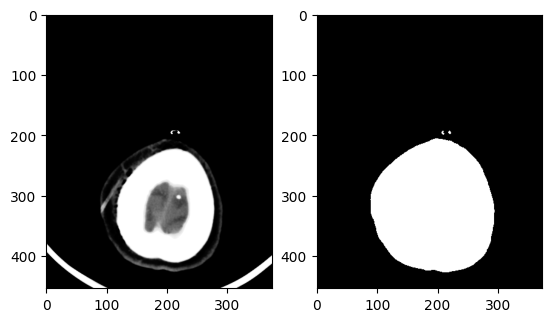

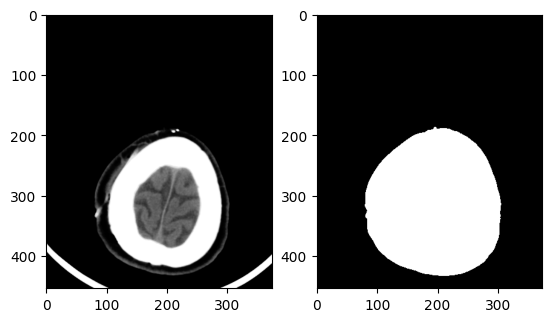

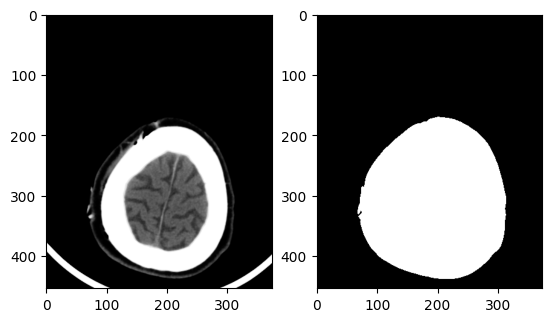

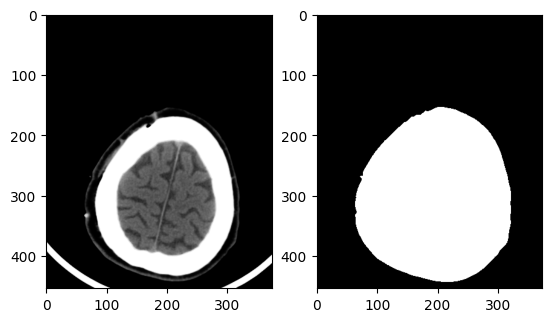

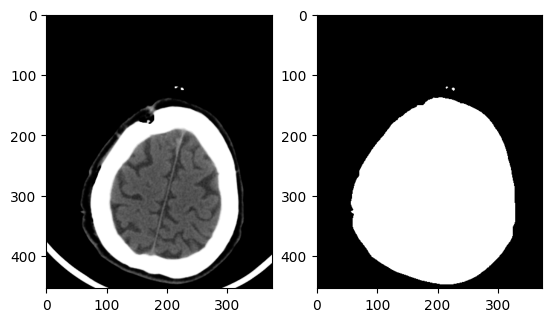

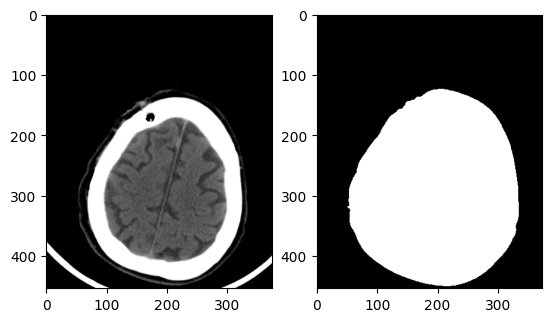

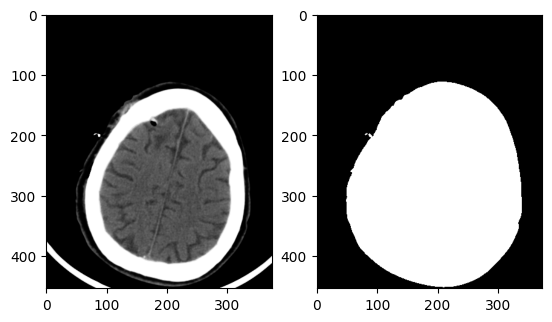

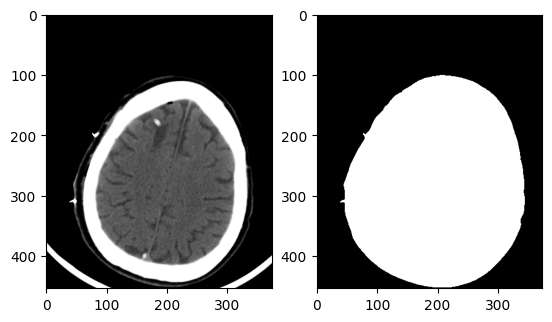

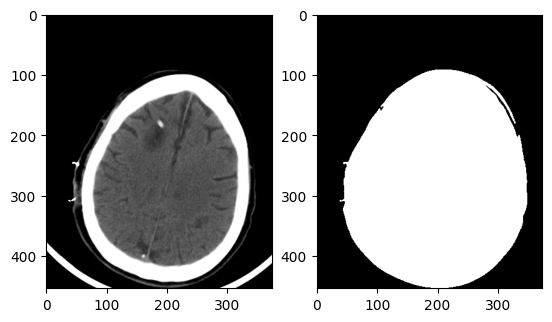

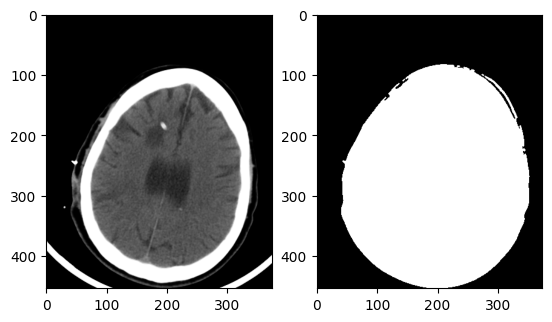

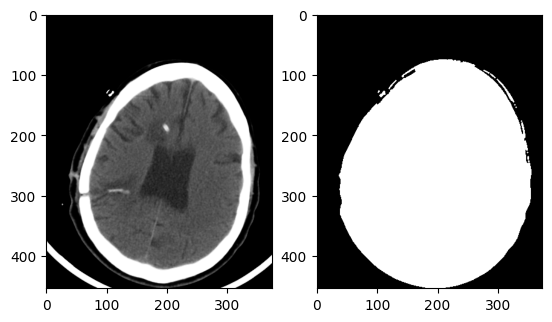

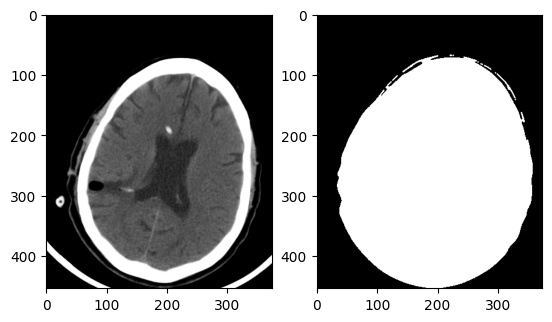

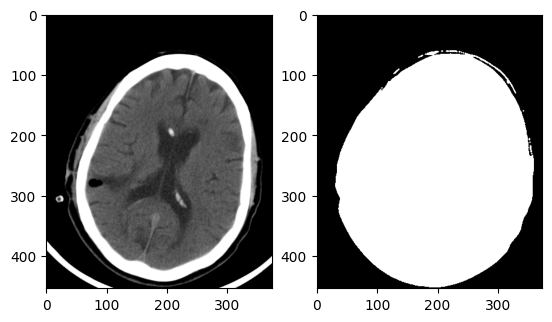

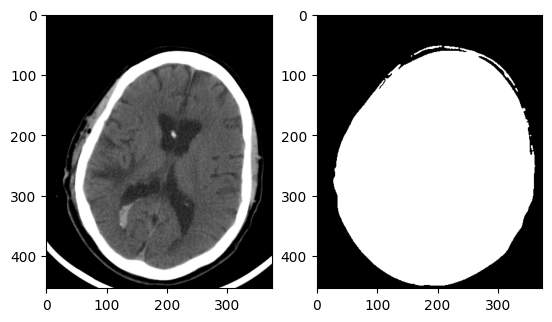

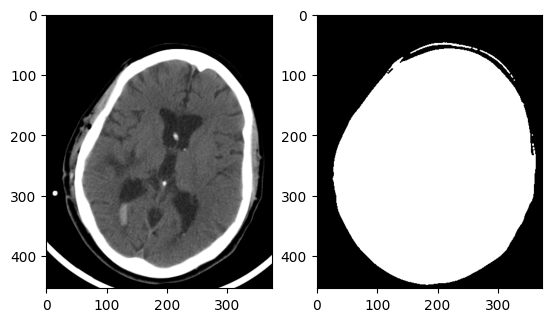

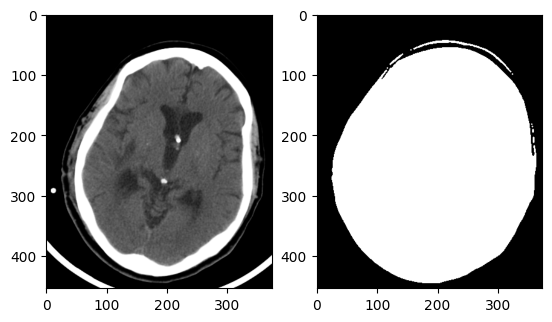

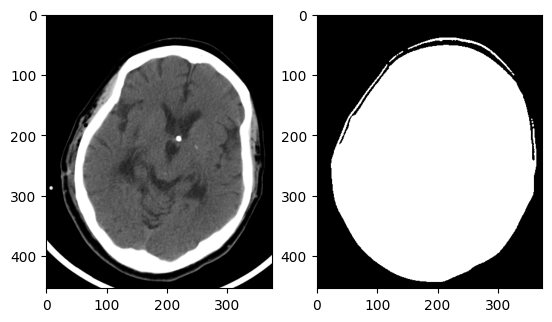

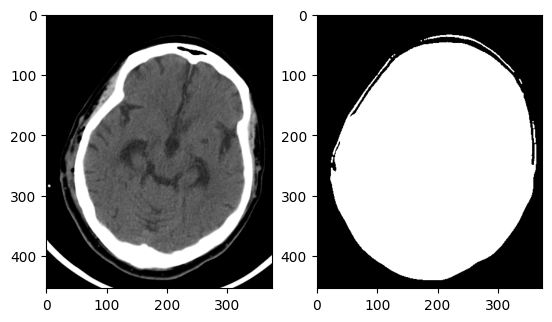

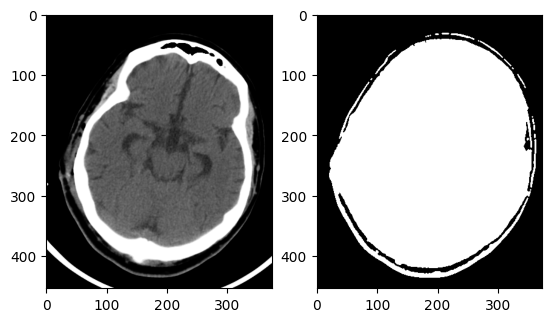

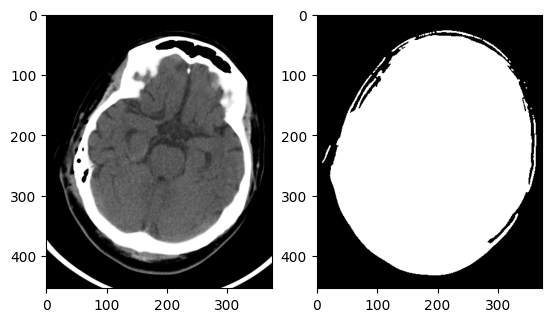

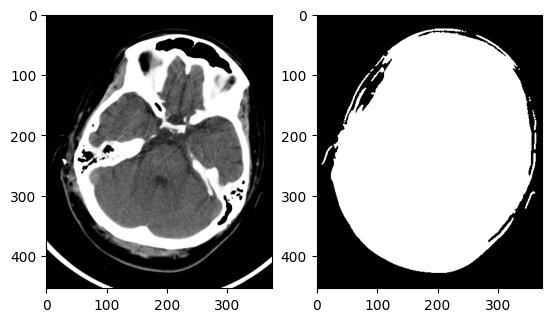

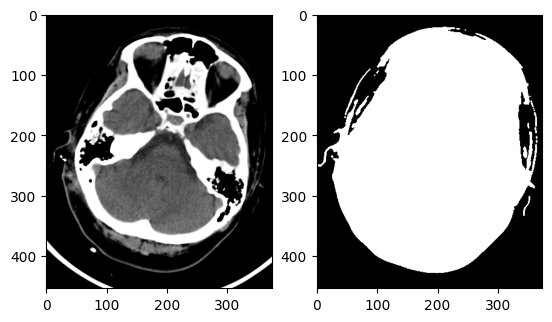

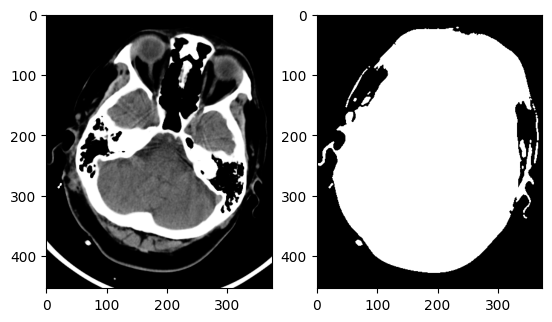

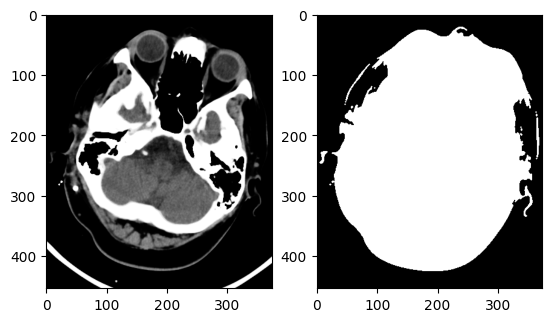

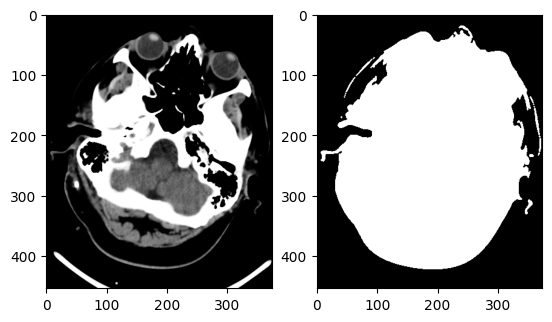

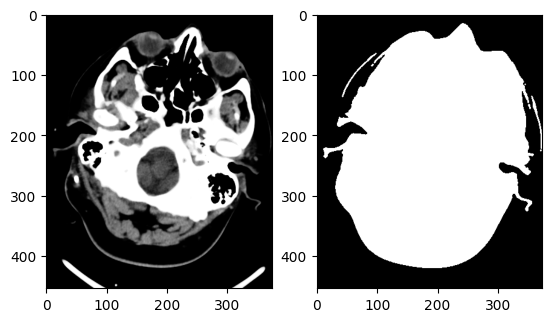

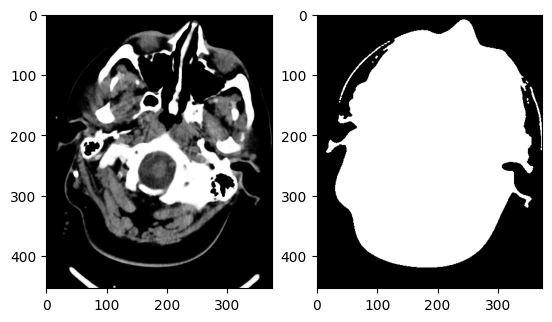

In [22]:
plot_3d_image_side_by_side(array, mask, num_images=15, axis=0)